In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 15)

In [4]:
# https://archive.ics.uci.edu/ml/index.php
# Breast Cancer Dataset (출처 : UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

In [5]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
# 전처리
df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

print(X_train.shape, X_test.shape)

(478, 9) (205, 9)


In [15]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

In [16]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)
print('\n')


[[122   4]
 [ 10  69]]


              precision    recall  f1-score   support

           2       0.92      0.97      0.95       126
           4       0.95      0.87      0.91        79

    accuracy                           0.93       205
   macro avg       0.93      0.92      0.93       205
weighted avg       0.93      0.93      0.93       205





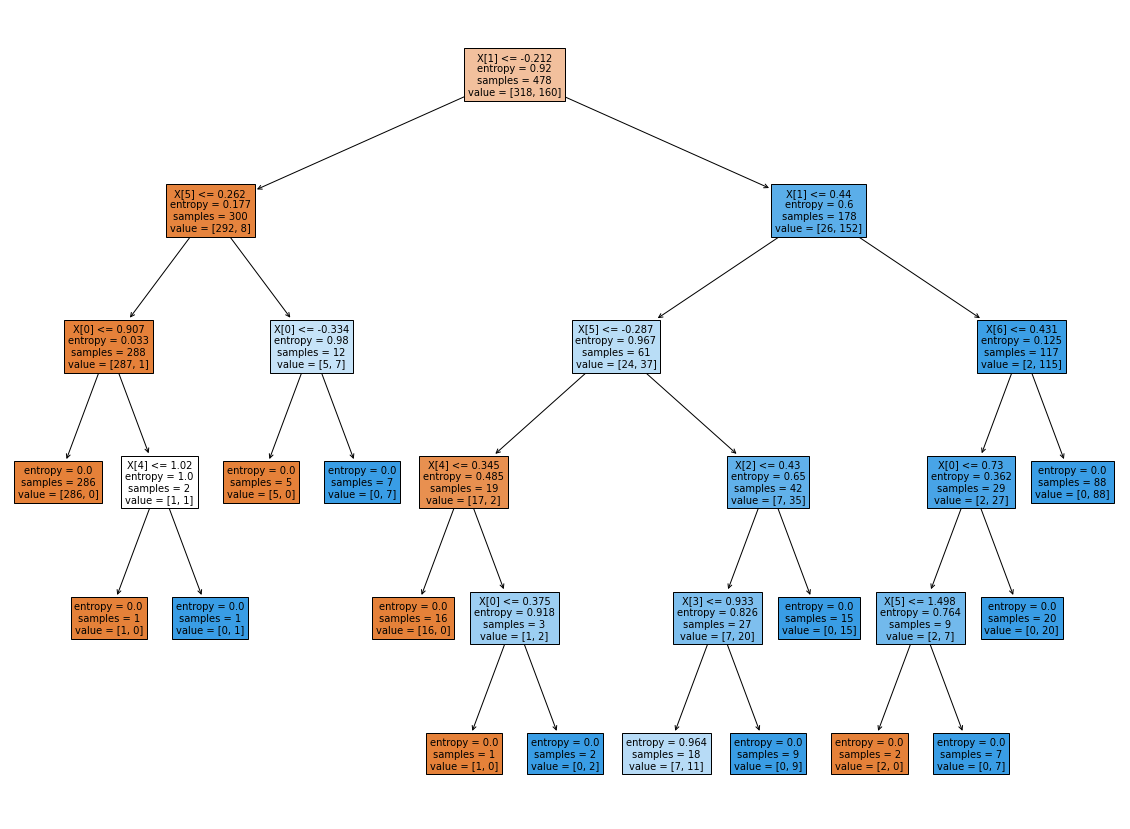

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(tree_model, filled=True)
